In [ ]:
# Name: Shanaia Buggy
# ASTR 3750 - Project


In [1]:
def welcome_message():
    print("This is a numerical simulation of the cratering process on a planetary surface!")
    
    print("\nThis simulation will verify the occurrence of saturation equilibrium: that the density")
    print("of craters reaches a maximum and remains roughly constant thereafter.")

In [11]:
def get_rand_coordinate(length):
    x = round(random.uniform(0.0,length),1)
    return x

In [38]:
def plot(count, x, y):
    colors = (0,0,0)
    area = np.pi*10
    #plot
    plt.scatter(x, y, s=area, c=colors, alpha=0.17)
    plt.title("Craters in test area at " + str(count) + " thousand years")
    plt.xlabel("km")
    plt.ylabel("km")
    plt.show()

In [4]:
def center_exists(x, y, x_array, y_array):
    for i in range(0, len(x_array)):
        if ((x_array[i] == x) and (y_array[i] == y)):
            #print("test")
            return True
        
    return False

In [5]:
def in_radius(x, y, x_array, y_array):
    flag = False
    for i in range(0,len(x_array)):
        if (x_array[i] == x):
            if (y_array[i] >= (y-25) or y_array[i] <= (y+25)):
                flag = True
        if (y_array[i] == y):
            if (x_array[i] >= (x-25) or x_array[i] <= (x+25)):
                flag = True
    return flag   

In [6]:
def equilibrium(count1, count2, time1, time2):
    avg1 = count1
    avg2 = count2
    five_percent = avg1 * 0.05
    difference = avg2 - avg1
    if (difference < five_percent):
        return True
    else:
        return False

In [22]:
def print_table(craters, time):
    print("\n_____________________________________________")
    print("___Time_(thousand yrs)__|___Num_of_Craters___")
    for i in range(0, len(time)):
        print("          ", time[i], (" "*(21-len(str(time[i])))), craters[i])
        #print("_______________________________________________")

This is a numerical simulation of the cratering process on a planetary surface!

This simulation will verify the occurrence of saturation equilibrium: that the density
of craters reaches a maximum and remains roughly constant thereafter.

Assume the test area of the planetary surface to be square.
Enter the test area length (km): 500


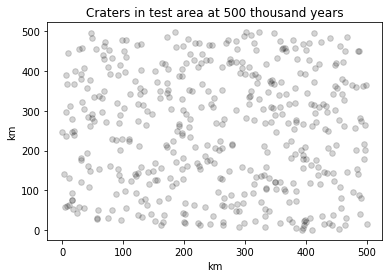

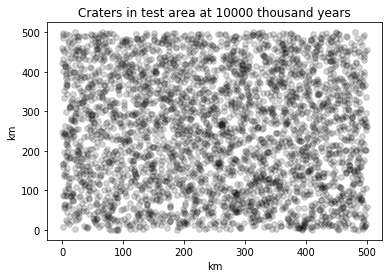

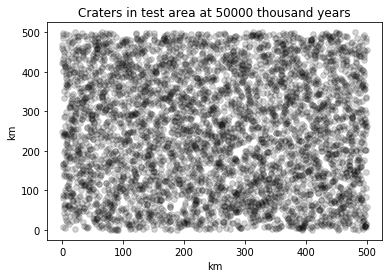


Hooray, saturation equilibrium has been reached!

    Time to saturation: 131072 thousand years
    Total number of craters in study area: 4831


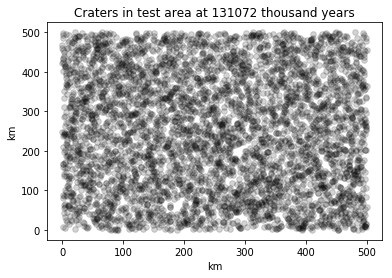


_____________________________________________
___Time_(thousand yrs)__|___Num_of_Craters___
           1                      1
           2                      2
           4                      4
           8                      8
           16                     16
           32                     32
           64                     64
           128                    126
           256                    242
           512                    458
           1024                   834
           2048                   1465
           4096                   2272
           8192                   3122
           16384                  3860
           32768                  4348
           65536                  4657
           131072                 4831


In [40]:
import random
import numpy as np
import matplotlib.pyplot as plt

def main():
    time = [1]
    craters = [1]
    x_arr = []
    y_arr = []
    crater_count = 0
    thousand_year_count = 0
    prev_year_count = 1
    prev_crater_count = 1
    equil_reached = False
    
    welcome_message()
    print("\nAssume the test area of the planetary surface to be square.")
    length = float(input("Enter the test area length (km): "))
    
    while equil_reached != True:

        thousand_year_count += 1
        x = get_rand_coordinate(length)
        y = get_rand_coordinate(length)
        #check if another crater center is within a radius of 25 km around point (x,y)
        exists = in_radius(x, y, x_arr, y_arr)
        if (exists == False):
            #If not, add new crater
            crater_count += 1
            x_arr.append(x)
            y_arr.append(y)
    
    
        if ((thousand_year_count / 2) == prev_year_count):
            time.append(thousand_year_count)
            craters.append(crater_count)
            equil_reached = equilibrium(prev_crater_count, crater_count, prev_year_count, thousand_year_count)
            prev_year_count = thousand_year_count
            prev_crater_count = crater_count
            
        if (thousand_year_count == 500):
            plot(thousand_year_count, x_arr, y_arr)
        if (thousand_year_count == 10000):
            plot(thousand_year_count, x_arr, y_arr) 
        if (thousand_year_count == 50000):
            plot(thousand_year_count, x_arr, y_arr)

    print("\nHooray, saturation equilibrium has been reached!\n")
    print("    Time to saturation:", thousand_year_count, "thousand years")
    print("    Total number of craters in study area:", crater_count)
    plot(thousand_year_count, x_arr, y_arr)
    print_table(craters, time)

if __name__=="__main__":
    main()

In [41]:
print("Number of craters as a function of time: ")
print("     y = 4999.669 + (0.7693134 - 4999.669)/(1 + (x/4933.376)^1.011019)")

Number of craters as a function of time: 
     y = 4999.669 + (0.7693134 - 4999.669)/(1 + (x/4933.376)^1.011019)
